# Medical Cost Estimator Using Supervised Machine Learning

This project focuses on building a supervised machine learning regression model to predict medical insurance charges based on patient-related features. The approach includes exploratory data analysis (EDA), linear regression, and gradient descent to understand patterns in healthcare costs and develop an accurate cost estimation model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
df=pd.read_csv("/content/insurance.csv")

In [3]:
print("Dataset Shape=",df.shape)

Dataset Shape= (1338, 7)


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
print("-----Dataset Info-----")
df.info()

-----Dataset Info-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
print("----Statistical Values----")
df.describe()

----Statistical Values----


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
print("----Missing Values----")
print(df.isnull().sum())

----Missing Values----
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


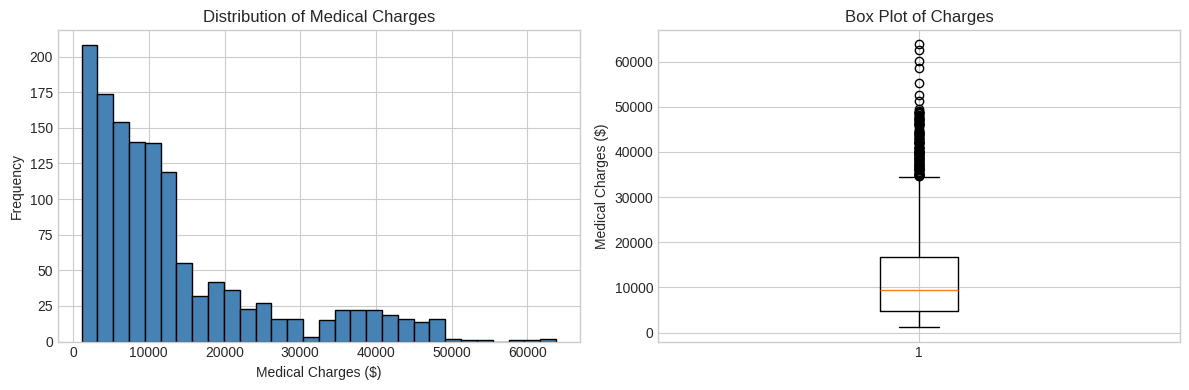

Mean Charges: $13,270.42
Median Charges: $9,382.03
Min: $1,121.87 | Max: $63,770.43


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df['charges'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Medical Charges ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Medical Charges')

# Box plot
axes[1].boxplot(df['charges'], vert=True)
axes[1].set_ylabel('Medical Charges ($)')
axes[1].set_title('Box Plot of Charges')

plt.tight_layout()
plt.show()

print(f"Mean Charges: ${df['charges'].mean():,.2f}")
print(f"Median Charges: ${df['charges'].median():,.2f}")
print(f"Min: ${df['charges'].min():,.2f} | Max: ${df['charges'].max():,.2f}")


In [15]:
outliers = df[df['charges'] > 40000]

print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of data: {len(outliers)/len(df)*100:.1f}%")
print("\n--- Outlier Characteristics ---")
print(outliers.describe())

Number of outliers: 79
Percentage of data: 5.9%

--- Outlier Characteristics ---
             age        bmi   children       charges
count  79.000000  79.000000  79.000000     79.000000
mean   48.746835  36.721203   1.303797  45681.017475
std    10.712404   4.529132   1.136283   4798.610322
min    22.000000  30.210000   0.000000  40003.332250
25%    43.000000  33.715000   0.000000  42167.826750
50%    50.000000  36.080000   1.000000  44585.455870
75%    57.500000  38.945000   2.000000  47433.387000
max    64.000000  52.580000   4.000000  63770.428010


In [16]:
print("\n--- Smoker Status of Outliers ---")
print(outliers['smoker'].value_counts())
print(f"\nPercentage who smoke: {(outliers['smoker']=='yes').mean()*100:.1f}%")


--- Smoker Status of Outliers ---
smoker
yes    79
Name: count, dtype: int64

Percentage who smoke: 100.0%


In [17]:
top_charges = df.nlargest(10, 'charges')
print(top_charges)

      age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
34     28    male  36.400         1    yes  southwest  51194.55914
1241   64    male  36.960         2    yes  southeast  49577.66240
1062   59    male  41.140         1    yes  southeast  48970.24760
488    44  female  38.060         0    yes  southeast  48885.13561


In [18]:
#average charges: Smokers vs Non-smokers
print("\n=== Average Charges by Smoker Status ===")
print(df.groupby('smoker')['charges'].mean())


=== Average Charges by Smoker Status ===
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


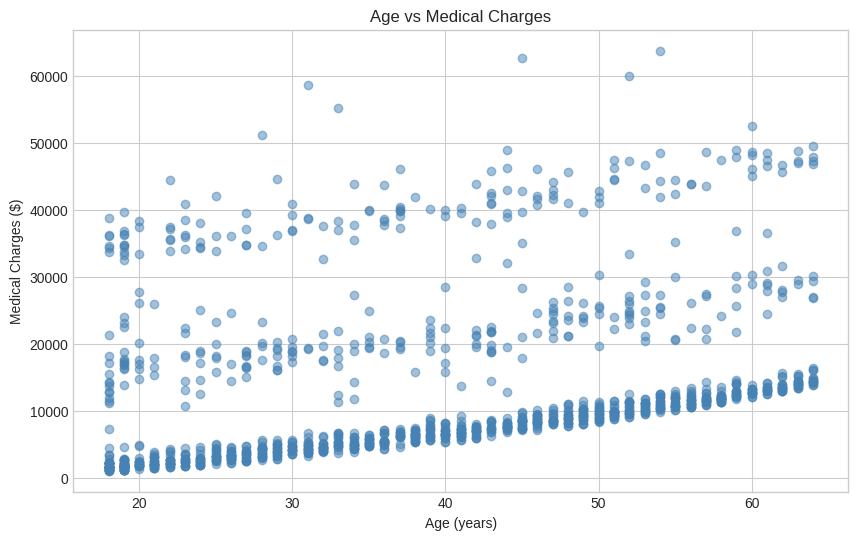

In [19]:
# Age vs Charges Scatter Plot
# Goal: See relationship between age and medical charges

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5, color='steelblue')
plt.xlabel('Age (years)')
plt.ylabel('Medical Charges ($)')
plt.title('Age vs Medical Charges')
plt.show()

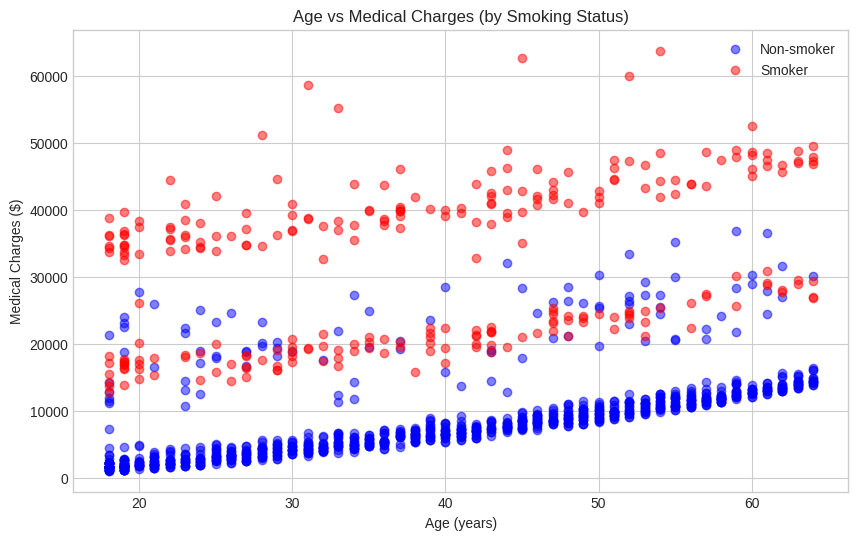

In [20]:
# Age vs Charges - Colored by Smoker Status
# Goal: See how smoking affects the age-charges relationship

plt.figure(figsize=(10, 6))


smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

# Plot each group with different colors
plt.scatter(non_smokers['age'], non_smokers['charges'],
            alpha=0.5, color='blue', label='Non-smoker')
plt.scatter(smokers['age'], smokers['charges'],
            alpha=0.5, color='red', label='Smoker')

plt.xlabel('Age (years)')
plt.ylabel('Medical Charges ($)')
plt.title('Age vs Medical Charges (by Smoking Status)')
plt.legend()
plt.show()

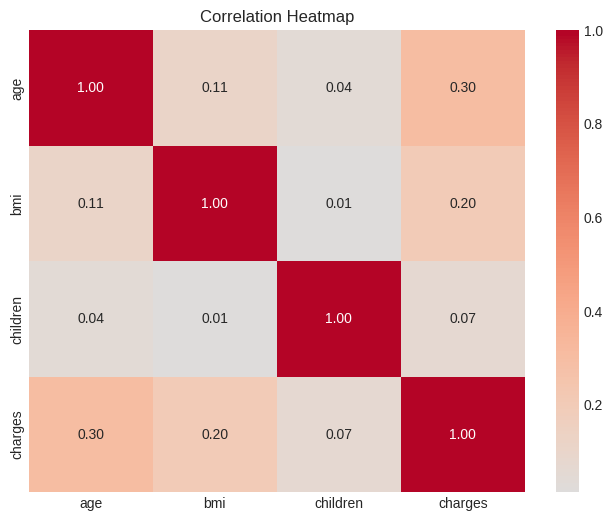


=== Correlation with Charges ===
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [21]:
# Correlation Heatmap
# Goal: See which numerical features correlate with charges

numerical_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print("\n=== Correlation with Charges ===")
print(correlation_matrix['charges'].sort_values(ascending=False))

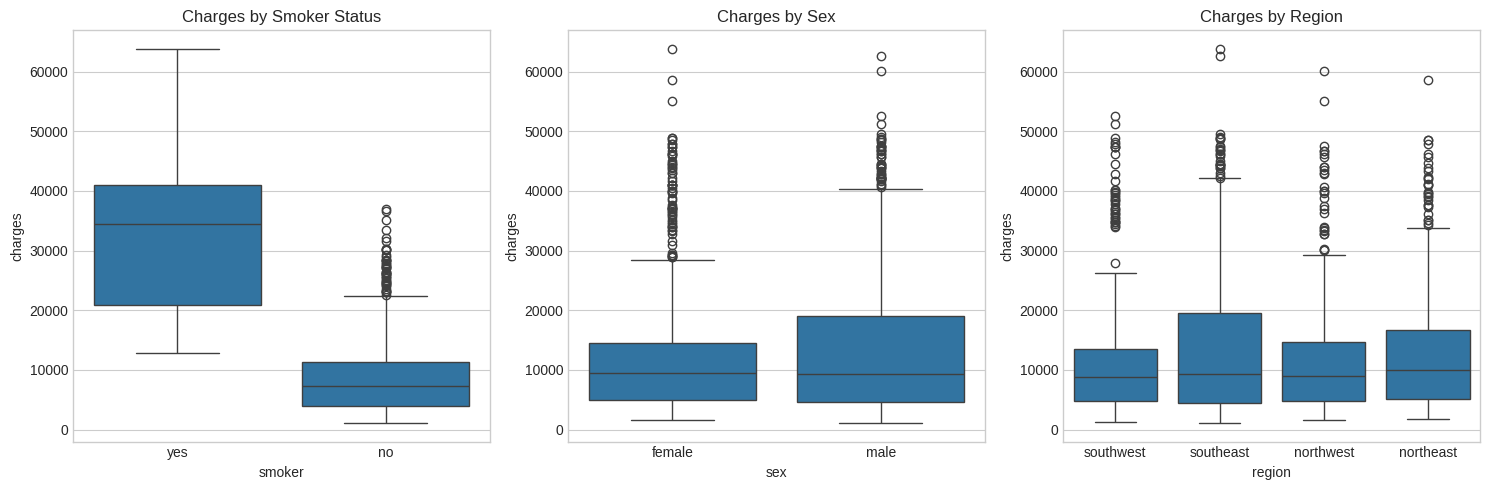

In [23]:
# Categorical Variables Impact
# Goal: See how categorical variables affect charges

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Charges by Smoker Status')

sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
axes[1].set_title('Charges by Sex')

sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()

## DATA PREPROCESSING

In [24]:

# Encode Categorical Variables

# Create a copy to preserve original data
df_encoded = df.copy()

# Convert 'smoker': yes=1, no=0
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

# Convert 'sex': male=1, female=0
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})

# Convert 'region': One-hot encoding (creates separate column for each region)
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

print("=== Encoded Dataset ===")
print(df_encoded.head())
print("\nColumns:", df_encoded.columns.tolist())

=== Encoded Dataset ===
   age  sex     bmi  ...  region_northwest  region_southeast  region_southwest
0   19    0  27.900  ...             False             False              True
1   18    1  33.770  ...             False              True             False
2   28    1  33.000  ...             False              True             False
3   33    1  22.705  ...              True             False             False
4   32    1  28.880  ...              True             False             False

[5 rows x 9 columns]

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest']


In [25]:
# Understand One-Hot Encoding

print("\n=== One-Hot Encoding Explained ===")
print("Original 'region' column had: northeast, northwest, southeast, southwest")
print("After encoding, we have:")
print("  - region_northwest: 1 if northwest, 0 otherwise")
print("  - region_southeast: 1 if southeast, 0 otherwise")
print("  - region_southwest: 1 if southwest, 0 otherwise")
print("  - (northeast is the 'base' - all zeros means northeast)")


=== One-Hot Encoding Explained ===
Original 'region' column had: northeast, northwest, southeast, southwest
After encoding, we have:
  - region_northwest: 1 if northwest, 0 otherwise
  - region_southeast: 1 if southeast, 0 otherwise
  - region_southwest: 1 if southwest, 0 otherwise
  - (northeast is the 'base' - all zeros means northeast)


# SIMPLE LINEAR REGRESSION (One Variable)

Goal: Predict charges using ONLY age

Formula: charges = w * age + b

In [26]:
# Prepare the Data

X_simple = df_encoded[['age']].values  # Feature (2D array)
y = df_encoded['charges'].values        # Target (1D array)

print("X shape:", X_simple.shape)  # Should be (1338, 1)
print("y shape:", y.shape)          # Should be (1338,)

X shape: (1338, 1)
y shape: (1338,)


In [27]:
# Split into Training and Testing Sets

# Training set: Model learns from this (80%)
# Testing set: We evaluate model on this (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility (same split every time)
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 1070
Testing samples: 268


In [28]:
# Train the Model using Scikit-learn

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Get the learned parameters
w = model_simple.coef_[0]      # Weight (slope)
b = model_simple.intercept_    # Bias (intercept)

print(f"\n=== Learned Parameters ===")
print(f"Weight (w): {w:.2f}")
print(f"Bias (b): {b:.2f}")
print(f"\nEquation: charges = {w:.2f} × age + {b:.2f}")


=== Learned Parameters ===
Weight (w): 240.60
Bias (b): 3876.93

Equation: charges = 240.60 × age + 3876.93


In [29]:
# Interpret the Results

print(f"\n=== Interpretation ===")
print(f"For every 1 year increase in age,")
print(f"medical charges increase by ${w:.2f} on average.")


=== Interpretation ===
For every 1 year increase in age,
medical charges increase by $240.60 on average.


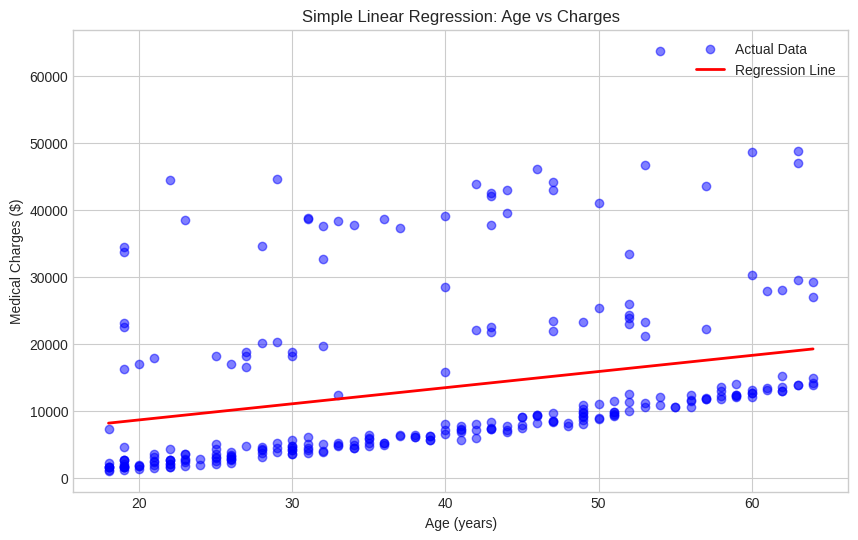

In [30]:
# Visualize the Regression Line

plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual Data')

# Plot the regression line
X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model_simple.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Age (years)')
plt.ylabel('Medical Charges ($)')
plt.title('Simple Linear Regression: Age vs Charges')
plt.legend()
plt.show()

In [31]:
# Evaluate the Model

y_pred_simple = model_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("=== Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse_simple:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_simple:,.2f}")
print(f"R² Score: {r2_simple:.4f}")

=== Model Evaluation ===
Mean Squared Error (MSE): 135,983,957.48
Root Mean Squared Error (RMSE): $11,661.22
R² Score: 0.1241


In [32]:
# Interpret Evaluation Metrics

print(f"\n=== Interpretation ===")
print(f"RMSE = ${rmse_simple:,.2f}")
print(f"  → On average, our predictions are off by ${rmse_simple:,.2f}")
print(f"\nR² = {r2_simple:.4f}")
print(f"  → Age alone explains {r2_simple*100:.1f}% of the variation in charges")
print(f"  → This is {'good' if r2_simple > 0.5 else 'low'} - we need more features!")


=== Interpretation ===
RMSE = $11,661.22
  → On average, our predictions are off by $11,661.22

R² = 0.1241
  → Age alone explains 12.4% of the variation in charges
  → This is low - we need more features!


In [33]:
# Normalize the Data

# Gradient descent works better when features are scaled

X_train_simple = X_train.flatten()  # Convert to 1D for simplicity
X_test_simple = X_test.flatten()

# Normalize: (value - mean) / std
X_mean = X_train_simple.mean()
X_std = X_train_simple.std()
y_mean = y_train.mean()
y_std = y_train.std()

X_train_norm = (X_train_simple - X_mean) / X_std
y_train_norm = (y_train - y_mean) / y_std

print(f"X normalized - Mean: {X_train_norm.mean():.4f}, Std: {X_train_norm.std():.4f}")
print(f"y normalized - Mean: {y_train_norm.mean():.4f}, Std: {y_train_norm.std():.4f}")

X normalized - Mean: -0.0000, Std: 1.0000
y normalized - Mean: 0.0000, Std: 1.0000


In [34]:
# Define the Cost Function (Mean Squared Error)

def compute_cost(X, y, w, b):
    """
    Calculates how wrong our predictions are.

    Parameters:
    -----------
    X : array - Input features (age)
    y : array - Actual values (charges)
    w : float - Weight (slope)
    b : float - Bias (intercept)

    Returns:
    --------
    cost : float - Average squared error
    """
    m = len(y)                          # Number of samples
    predictions = w * X + b             # Our predictions: y_hat = wx + b
    errors = predictions - y            # How far off we are
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Average squared error
    return cost

In [35]:
# Define the Gradient Function

def compute_gradients(X, y, w, b):
    """
    Calculates which direction to adjust w and b.

    The gradient tells us:
    - If positive: parameter is too high, decrease it
    - If negative: parameter is too low, increase it

    Returns:
    --------
    dw : float - Gradient for weight
    db : float - Gradient for bias
    """
    m = len(y)
    predictions = w * X + b
    errors = predictions - y

    dw = (1 / m) * np.sum(errors * X)  # Derivative with respect to w
    db = (1 / m) * np.sum(errors)       # Derivative with respect to b

    return dw, db

In [36]:
# Implement Gradient Descent

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Finds the best w and b by iteratively reducing the cost.

    Parameters:
    -----------
    X : array - Input features (normalized)
    y : array - Target values (normalized)
    learning_rate : float - Step size (too big = overshoot, too small = slow)
    num_iterations : int - How many steps to take

    Returns:
    --------
    w, b : floats - Learned parameters
    cost_history : list - Cost at each iteration (for plotting)
    """
    # Initialize parameters randomly (starting point)
    w = 0.0
    b = 0.0

    # Store cost at each iteration for visualization
    cost_history = []

    # Iterate and improve
    for i in range(num_iterations):
        # Step 1: Calculate gradients (which direction to go)
        dw, db = compute_gradients(X, y, w, b)

        # Step 2: Update parameters (take a step)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Step 3: Calculate and store cost
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost = {cost:.6f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history

In [37]:
# Run Gradient Descent

print("=== Running Gradient Descent ===\n")

w_gd, b_gd, cost_history = gradient_descent(
    X_train_norm,
    y_train_norm,
    learning_rate=0.1,
    num_iterations=1000
)

print(f"\n=== Final Parameters (Normalized) ===")
print(f"w = {w_gd:.4f}")
print(f"b = {b_gd:.4f}")

=== Running Gradient Descent ===

Iteration    0: Cost = 0.492460, w = 0.0282, b = 0.0000
Iteration  100: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  200: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  300: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  400: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  500: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  600: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  700: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  800: Cost = 0.460317, w = 0.2817, b = 0.0000
Iteration  900: Cost = 0.460317, w = 0.2817, b = 0.0000

=== Final Parameters (Normalized) ===
w = 0.2817
b = 0.0000


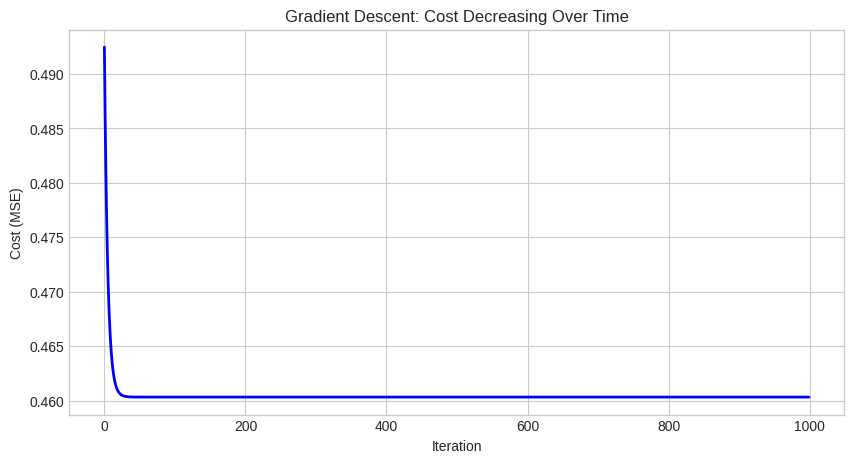

The cost should decrease and flatten out - this means the model has learned!


In [38]:
# Visualize Cost Function Convergence

plt.figure(figsize=(10, 5))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent: Cost Decreasing Over Time')
plt.grid(True)
plt.show()

print("The cost should decrease and flatten out - this means the model has learned!")

In [39]:
# Convert Parameters Back to Original Scale
# Our model learned on normalized data, but we want real predictions

w_original = w_gd * (y_std / X_std)
b_original = y_mean - w_original * X_mean

print(f"\n=== Parameters (Original Scale) ===")
print(f"w (our gradient descent): {w_original:.2f}")
print(f"b (our gradient descent): {b_original:.2f}")
print(f"\nw (sklearn): {model_simple.coef_[0]:.2f}")
print(f"b (sklearn): {model_simple.intercept_:.2f}")
print("\nThey should be very close!")


=== Parameters (Original Scale) ===
w (our gradient descent): 240.60
b (our gradient descent): 3876.93

w (sklearn): 240.60
b (sklearn): 3876.93

They should be very close!


In [40]:
# Compare Predictions
# Make predictions with our model
y_pred_gd = w_original * X_test_simple + b_original

# Calculate R² score
r2_gd = r2_score(y_test, y_pred_gd)

print(f"\n=== Comparison ===")
print(f"R² (Our Gradient Descent): {r2_gd:.4f}")
print(f"R² (Sklearn): {r2_simple:.4f}")
print(f"\nOur implementation matches sklearn!")


=== Comparison ===
R² (Our Gradient Descent): 0.1241
R² (Sklearn): 0.1241

Our implementation matches sklearn!


# MULTIPLE LINEAR REGRESSION
Goal: Use ALL features to predict charges (better accuracy!)

In [41]:
# Prepare Features

# Use all columns except 'charges' (our target)

X_multi = df_encoded.drop('charges', axis=1).values
y_multi = df_encoded['charges'].values

print("Features:", df_encoded.drop('charges', axis=1).columns.tolist())
print(f"\nX shape: {X_multi.shape}")  # (1338, 8) - 8 features now
print(f"y shape: {y_multi.shape}")

Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

X shape: (1338, 8)
y shape: (1338,)


In [42]:
# Split the Data

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42
)

print(f"Training samples: {len(X_train_multi)}")
print(f"Testing samples: {len(X_test_multi)}")

Training samples: 1070
Testing samples: 268


In [43]:
# Feature Scaling
# Important for multiple regression - brings all features to similar scale

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)  # Fit on training data
X_test_scaled = scaler.transform(X_test_multi)         # Transform test data

print("Features scaled successfully!")
print(f"Mean of scaled features: {X_train_scaled.mean(axis=0).round(2)}")  # Should be ~0
print(f"Std of scaled features: {X_train_scaled.std(axis=0).round(2)}")    # Should be ~1

Features scaled successfully!
Mean of scaled features: [-0. -0.  0. -0.  0. -0. -0.  0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1.]


In [44]:
# Train the Model

model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train_multi)

print("=== Learned Coefficients ===")
feature_names = df_encoded.drop('charges', axis=1).columns.tolist()

for name, coef in zip(feature_names, model_multi.coef_):
    print(f"  {name:20s}: {coef:>10.2f}")

print(f"\n  {'Intercept':20s}: {model_multi.intercept_:>10.2f}")

=== Learned Coefficients ===
  age                 :    3614.98
  sex                 :      -9.29
  bmi                 :    2036.23
  children            :     516.89
  smoker              :    9558.48
  region_northwest    :    -158.14
  region_southeast    :    -290.16
  region_southwest    :    -349.11

  Intercept           :   13346.09


In [45]:
# Evaluate the Model

y_pred_multi = model_multi.predict(X_test_scaled)

mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("=== Multiple Regression Results ===")
print(f"RMSE: ${rmse_multi:,.2f}")
print(f"R² Score: {r2_multi:.4f}")

=== Multiple Regression Results ===
RMSE: $5,796.28
R² Score: 0.7836


In [46]:
# Compare Simple vs Multiple Regression

print("\n" + "="*50)
print("COMPARISON: Simple vs Multiple Regression")
print("="*50)
print(f"\n{'Metric':<20} {'Simple (Age only)':<20} {'Multiple (All features)':<20}")
print("-"*60)
print(f"{'RMSE':<20} ${rmse_simple:>15,.2f} ${rmse_multi:>15,.2f}")
print(f"{'R² Score':<20} {r2_simple:>15.4f} {r2_multi:>15.4f}")
print("-"*60)

improvement = ((r2_multi - r2_simple) / r2_simple) * 100
print(f"\nR² Improvement: {improvement:.1f}%")
print(f"\nConclusion: Adding more features significantly improved our model!")


COMPARISON: Simple vs Multiple Regression

Metric               Simple (Age only)    Multiple (All features)
------------------------------------------------------------
RMSE                 $      11,661.22 $       5,796.28
R² Score                      0.1241          0.7836
------------------------------------------------------------

R² Improvement: 531.5%

Conclusion: Adding more features significantly improved our model!


# FEATURE IMPORTANCE

 Goal: Understand which features matter most

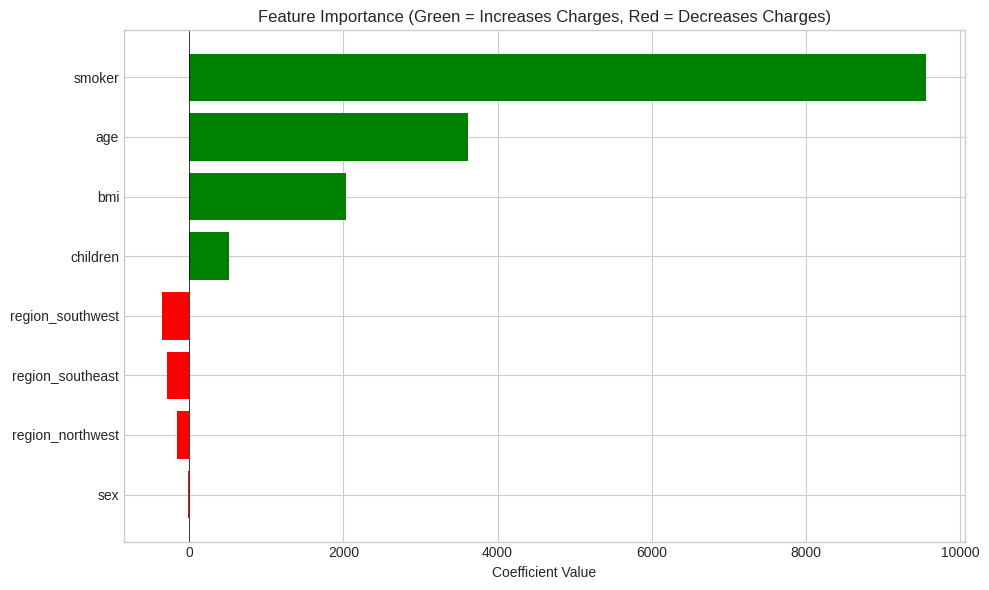

In [47]:
# Visualize Feature Importance

importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_multi.coef_
})
importance['Abs_Coefficient'] = abs(importance['Coefficient'])
importance = importance.sort_values('Abs_Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'green' for c in importance['Coefficient']]
plt.barh(importance['Feature'], importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Green = Increases Charges, Red = Decreases Charges)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [48]:
# Interpret the Results

print("=== Feature Interpretation ===\n")

# Sort by absolute importance
importance_sorted = importance.sort_values('Abs_Coefficient', ascending=False)

for _, row in importance_sorted.iterrows():
    direction = "INCREASES" if row['Coefficient'] > 0 else "DECREASES"
    print(f"{row['Feature']:20s}: {direction} charges by ${abs(row['Coefficient']):,.2f}")

=== Feature Interpretation ===

smoker              : INCREASES charges by $9,558.48
age                 : INCREASES charges by $3,614.98
bmi                 : INCREASES charges by $2,036.23
children            : INCREASES charges by $516.89
region_southwest    : DECREASES charges by $349.11
region_southeast    : DECREASES charges by $290.16
region_northwest    : DECREASES charges by $158.14
sex                 : DECREASES charges by $9.29


# RESIDUAL ANALYSIS

Goal: Check if our model's errors are random (which is good!)

In [49]:
# Calculate Residuals

residuals = y_test_multi - y_pred_multi

print("=== Residual Statistics ===")
print(f"Mean of residuals: ${residuals.mean():,.2f}")  # Should be close to 0
print(f"Std of residuals: ${residuals.std():,.2f}")

=== Residual Statistics ===
Mean of residuals: $-219.24
Std of residuals: $5,792.14


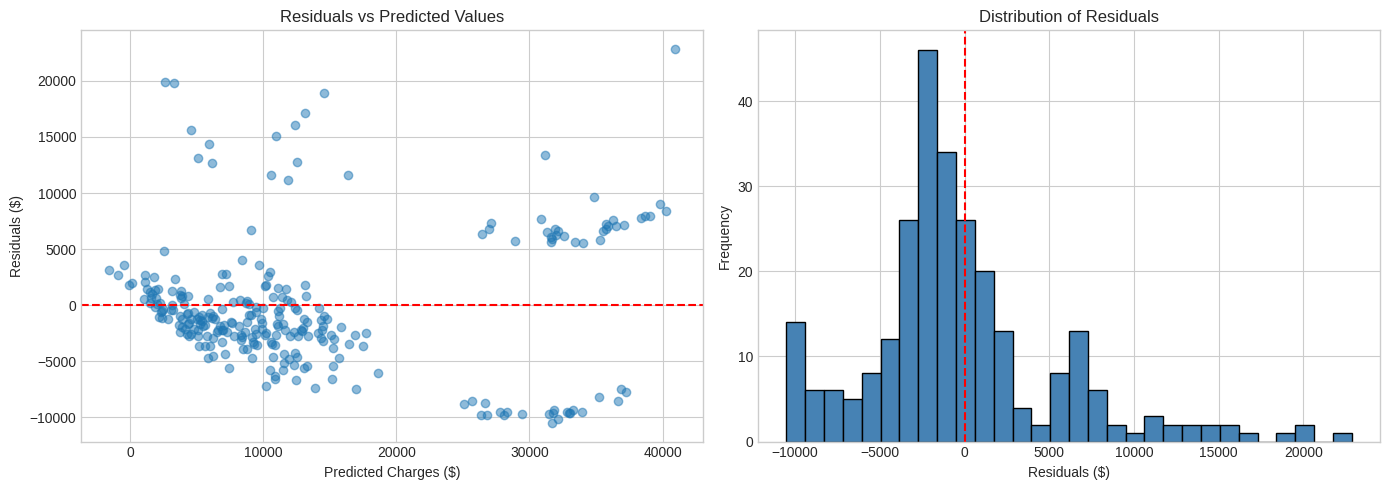

In [50]:
# Residual Plots

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Residuals vs Predicted Values
axes[0].scatter(y_pred_multi, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Charges ($)')
axes[0].set_ylabel('Residuals ($)')
axes[0].set_title('Residuals vs Predicted Values')

# Plot 2: Distribution of Residuals
axes[1].hist(residuals, bins=30, edgecolor='black', color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--')
axes[1].set_xlabel('Residuals ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()

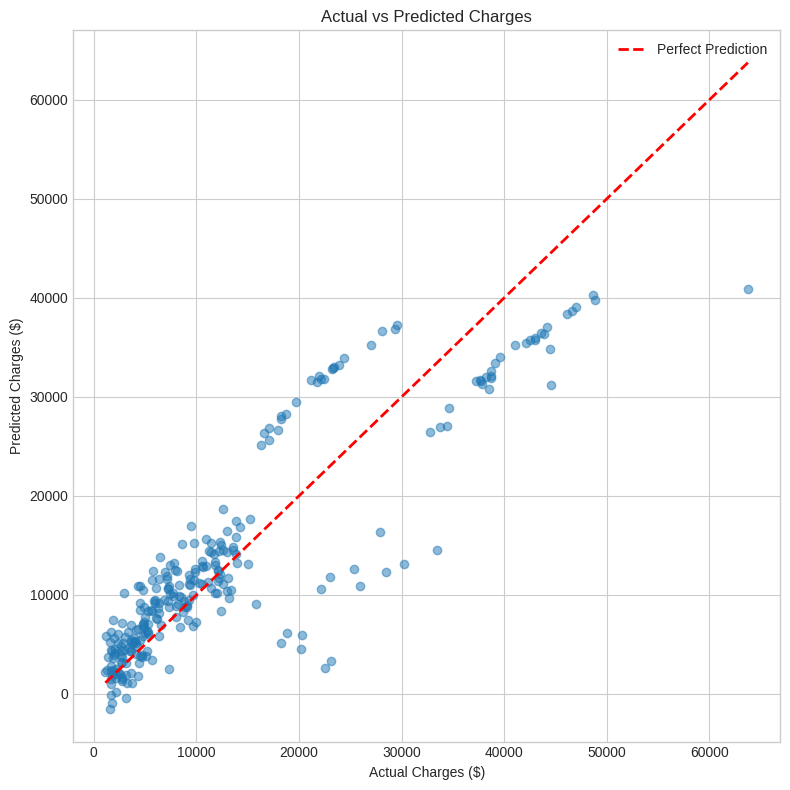

Points closer to the red line = better predictions!


In [51]:
# Actual vs Predicted Plot

plt.figure(figsize=(8, 8))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5)
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.tight_layout()
plt.show()

print("Points closer to the red line = better predictions!")

In [52]:
# MAKE PREDICTIONS ON NEW DATA
# Goal: Use our model to predict charges for new patients

def predict_charges(age, sex, bmi, children, smoker, region):
    """
    Predicts medical charges for a new patient.

    Parameters:
    -----------
    age : int - Patient's age
    sex : str - 'male' or 'female'
    bmi : float - Body Mass Index
    children : int - Number of children
    smoker : str - 'yes' or 'no'
    region : str - 'northeast', 'northwest', 'southeast', or 'southwest'

    Returns:
    --------
    prediction : float - Predicted medical charges
    """
    # Encode inputs
    sex_encoded = 1 if sex == 'male' else 0
    smoker_encoded = 1 if smoker == 'yes' else 0
    region_nw = 1 if region == 'northwest' else 0
    region_se = 1 if region == 'southeast' else 0
    region_sw = 1 if region == 'southwest' else 0

    # Create feature array (same order as training!)
    features = np.array([[age, sex_encoded, bmi, children, smoker_encoded,
                          region_nw, region_se, region_sw]])

    # Scale features using the same scaler
    features_scaled = scaler.transform(features)

    # Make prediction
    prediction = model_multi.predict(features_scaled)[0]

    return prediction

In [53]:
# Test with Example Patients

print("=== Predictions for New Patients ===\n")

# Patient 1: Young non-smoker
pred1 = predict_charges(age=25, sex='female', bmi=22, children=0, smoker='no', region='northwest')
print(f"Patient 1 (25yo, female, non-smoker, healthy BMI)")
print(f"Predicted charges: ${pred1:,.2f}\n")

# Patient 2: Middle-aged smoker
pred2 = predict_charges(age=45, sex='male', bmi=30, children=2, smoker='yes', region='southeast')
print(f"Patient 2 (45yo, male, smoker, overweight)")
print(f"Predicted charges: ${pred2:,.2f}\n")

# Patient 3: Older non-smoker
pred3 = predict_charges(age=60, sex='female', bmi=28, children=0, smoker='no', region='northeast')
print(f"Patient 3 (60yo, female, non-smoker)")
print(f"Predicted charges: ${pred3:,.2f}\n")

print(f"Difference between smoker and non-smoker: ${pred2 - pred1:,.2f}")

=== Predictions for New Patients ===

Patient 1 (25yo, female, non-smoker, healthy BMI)
Predicted charges: $1,538.53

Patient 2 (45yo, male, smoker, overweight)
Predicted charges: $33,570.69

Patient 3 (60yo, female, non-smoker)
Predicted charges: $12,925.91

Difference between smoker and non-smoker: $32,032.16


In [54]:
# FINAL SUMMARY


print("="*60)
print("MEDICAL COST ESTIMATOR - PROJECT SUMMARY")
print("="*60)

print("""
DATASET:
- 1,338 patients with medical insurance data
- Features: age, sex, BMI, children, smoker status, region
- Target: Medical charges ($)

KEY FINDINGS:
""")

print(f"1. Charges are right-skewed (Mean ${df['charges'].mean():,.0f} > Median ${df['charges'].median():,.0f})")
print(f"2. Smokers pay significantly more (${df[df['smoker']=='yes']['charges'].mean():,.0f} vs ${df[df['smoker']=='no']['charges'].mean():,.0f})")
print(f"3. Age positively correlates with charges")

print(f"""
MODEL COMPARISON:
- Simple Linear Regression (age only): R² = {r2_simple:.4f}
- Multiple Linear Regression (all features): R² = {r2_multi:.4f}

MOST IMPORTANT FEATURES:
""")

for _, row in importance_sorted.head(3).iterrows():
    print(f"  - {row['Feature']}: coefficient = {row['Coefficient']:,.2f}")

print("""
GRADIENT DESCENT:
- Successfully implemented from scratch
- Results match sklearn's implementation
- Demonstrated understanding of optimization

CONCLUSIONS:
- Smoking status is the strongest predictor of medical costs
- Adding more features improved R² by {:.1f}%
- The model can predict medical charges with reasonable accuracy
""".format(improvement))

MEDICAL COST ESTIMATOR - PROJECT SUMMARY

DATASET:
- 1,338 patients with medical insurance data
- Features: age, sex, BMI, children, smoker status, region
- Target: Medical charges ($)

KEY FINDINGS:

1. Charges are right-skewed (Mean $13,270 > Median $9,382)
2. Smokers pay significantly more ($32,050 vs $8,434)
3. Age positively correlates with charges

MODEL COMPARISON:
- Simple Linear Regression (age only): R² = 0.1241
- Multiple Linear Regression (all features): R² = 0.7836

MOST IMPORTANT FEATURES:

  - smoker: coefficient = 9,558.48
  - age: coefficient = 3,614.98
  - bmi: coefficient = 2,036.23

GRADIENT DESCENT:
- Successfully implemented from scratch
- Results match sklearn's implementation
- Demonstrated understanding of optimization

CONCLUSIONS:
- Smoking status is the strongest predictor of medical costs
- Adding more features improved R² by 531.5%
- The model can predict medical charges with reasonable accuracy

